In [1]:
## Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Load the CSV file into a dataframe
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head(10)

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,0.0,161.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,27000.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,2012.0,23000.0,8.5,164000
4,Doug Walker,NaN,131.0,NaN,Rob Walker,131.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,12.0,7.1,0
5,Andrew Stanton,462.0,475.0,530.0,Samantha Morton,640.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,2012.0,632.0,6.6,24000
6,Sam Raimi,392.0,0.0,4000.0,James Franco,24000.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,2007.0,11000.0,6.2,0
7,Nathan Greno,324.0,15.0,284.0,Donna Murphy,799.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,2010.0,553.0,7.8,29000
8,Joss Whedon,635.0,0.0,19000.0,Robert Downey Jr.,26000.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,2015.0,21000.0,7.5,118000
9,David Yates,375.0,282.0,10000.0,Daniel Radcliffe,25000.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,2009.0,11000.0,7.5,10000


In [4]:
# Extract the unique director names from the DataFrame
directors = df['director_name'].unique()

# Count the total number of unique directors
total_directors = len(directors)

# Print the list of directors
print("List of Directors:")
for name in directors[:10]:
    print(name)

# Print the total number of unique directors
print("Total number of unique directors:", total_directors)

List of Directors:
James Cameron
Gore Verbinski
Sam Mendes
Christopher Nolan
Doug Walker
Andrew Stanton
Sam Raimi
Nathan Greno
Joss Whedon
David Yates
Total number of unique directors: 2399


In [5]:
# Group the DataFrame by director name and calculate the count of movies and average rating, and store this data in a new df
director_stats = df.groupby('director_name').agg({'imdb_score': ['count', 'mean']})

# Rename the columns for clarity
director_stats.columns = ['num_movies', 'average_rating']

# Print the statistics for each director
print(director_stats)

                    num_movies  average_rating
director_name                                 
A. Raven Cruz                1             1.9
Aaron Hann                   1             6.0
Aaron Schneider              1             7.1
Aaron Seltzer                1             2.7
Abel Ferrara                 1             6.6
...                        ...             ...
Zoran Lisinac                1             7.1
Álex de la Iglesia           1             6.1
Émile Gaudreault             1             6.7
Éric Tessier                 1             6.6
Étienne Faure                1             4.3

[2398 rows x 2 columns]


In [6]:
# Sort the DataFrame by the number of movies in descending order
director_stats = director_stats.sort_values(by='num_movies', ascending=False)

# Print the sorted DataFrame
print(director_stats.head(10))

                   num_movies  average_rating
director_name                                
Steven Spielberg           26        7.480769
Woody Allen                22        7.009091
Clint Eastwood             20        7.225000
Martin Scorsese            20        7.660000
Ridley Scott               17        7.070588
Steven Soderbergh          16        6.706250
Spike Lee                  16        6.568750
Tim Burton                 16        6.931250
Renny Harlin               15        5.746667
Oliver Stone               14        6.950000


In [7]:
# Sort the DataFrame by the average rating in descending order
director_stats = director_stats.sort_values(by='average_rating', ascending=False)

# Select the top 10 directors with the highest average ratings
top_10_directors = director_stats.head(10)

# Print the top 10 directors
print("Top 10 Directors with the Highest Average Ratings:")
print(top_10_directors)

Top 10 Directors with the Highest Average Ratings:
                  num_movies  average_rating
director_name                               
John Blanchard             1             9.5
Cary Bell                  1             8.7
Sadyk Sher-Niyaz           1             8.7
Mitchell Altieri           1             8.7
Charles Chaplin            1             8.6
Mike Mayhall               1             8.6
Majid Majidi               1             8.5
Raja Menon                 1             8.5
Ron Fricke                 1             8.5
Damien Chazelle            1             8.5


In [8]:
# Split the genres and expand them into separate rows
genre_split = df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

# Join the genre information with the original DataFrame
df_genre = df.join(genre_split)

# Group by genre and calculate the average rating
genre_average_rating = df_genre.groupby('genre')['imdb_score'].mean()

# Print the average rating for each genre
print("Average rating for each genre:")
print(genre_average_rating)

Average rating for each genre:
genre
Action         6.239896
Adventure      6.441170
Animation      6.576033
Biography      7.150171
Comedy         6.195246
Crime          6.564792
Documentary    7.180165
Drama          6.763763
Family         6.245055
Fantasy        6.307049
Film-Noir      7.633333
Game-Show      2.900000
History        7.083575
Horror         5.843540
Music          6.410280
Musical        6.507576
Mystery        6.486400
News           7.533333
Reality-TV     4.750000
Romance        6.450587
Sci-Fi         6.281818
Short          6.380000
Sport          6.606044
Thriller       6.314245
War            7.070423
Western        6.689691
Name: imdb_score, dtype: float64


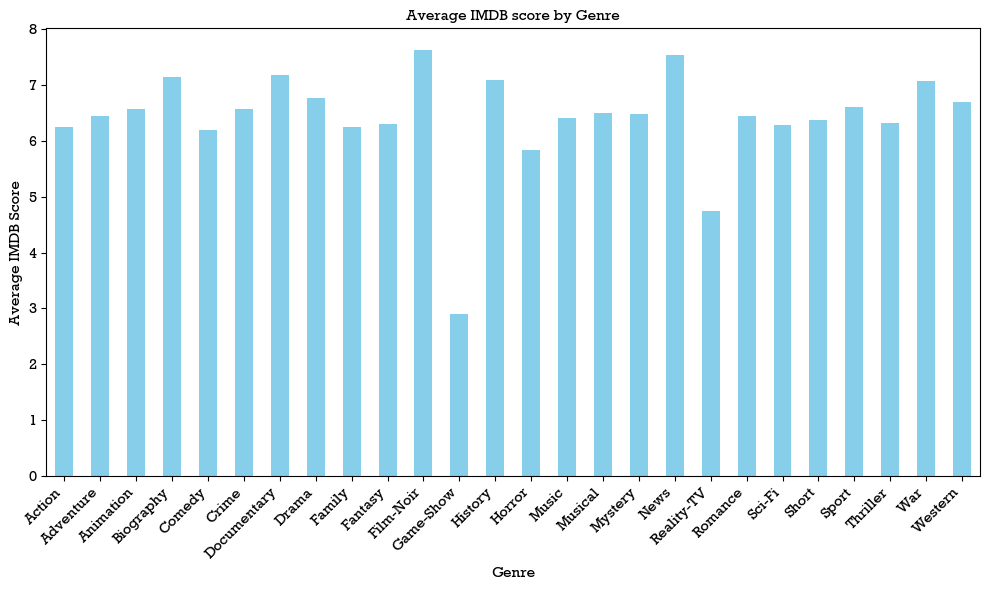

In [9]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
genre_average_rating.plot(kind='bar', color='skyblue')
plt.title('Average IMDB score by Genre', font = 'RockWell')
plt.xlabel('Genre', font = 'RockWell')
plt.ylabel('Average IMDB Score', font = 'RockWell') 
plt.xticks(rotation=45, ha='right', font = 'RockWell')
plt.yticks(font = 'RockWell')
plt.tight_layout()
plt.show()

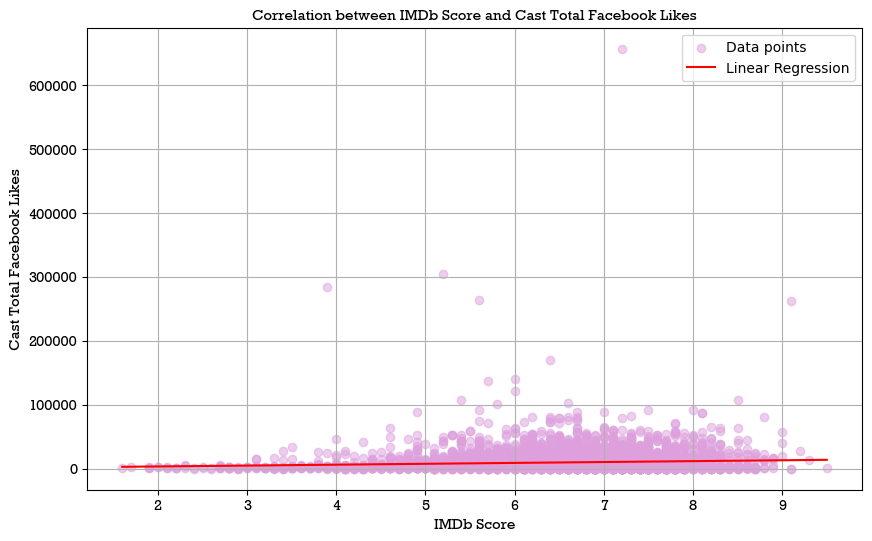

In [10]:
# Extract IMDb score and cast total Facebook likes
imdb_scores = df['imdb_score']
cast_fb_likes = df['cast_total_facebook_likes']

# Perform linear regression
slope, intercept = np.polyfit(imdb_scores, cast_fb_likes, 1)
x_values = np.linspace(imdb_scores.min(), imdb_scores.max(), 100)
y_values = slope * x_values + intercept

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(imdb_scores, cast_fb_likes, label='Data points', alpha=0.5, color='plum')

# Plot the linear regression line
plt.plot(x_values, y_values, label='Linear Regression', color='red')

# Add labels and title
plt.title('Correlation between IMDb Score and Cast Total Facebook Likes', font = 'RockWell')
plt.xlabel('IMDb Score', font = 'RockWell')
plt.ylabel('Cast Total Facebook Likes', font = 'RockWell')
plt.xticks(font = 'RockWell')
plt.yticks(font = 'RockWell')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

The correlation between IMDb Score and Cast Total Facebook Likes is 0.09
The correlation between IMDb Score and Cast Total Facebook Likes (Outliers Removed) is 0.12


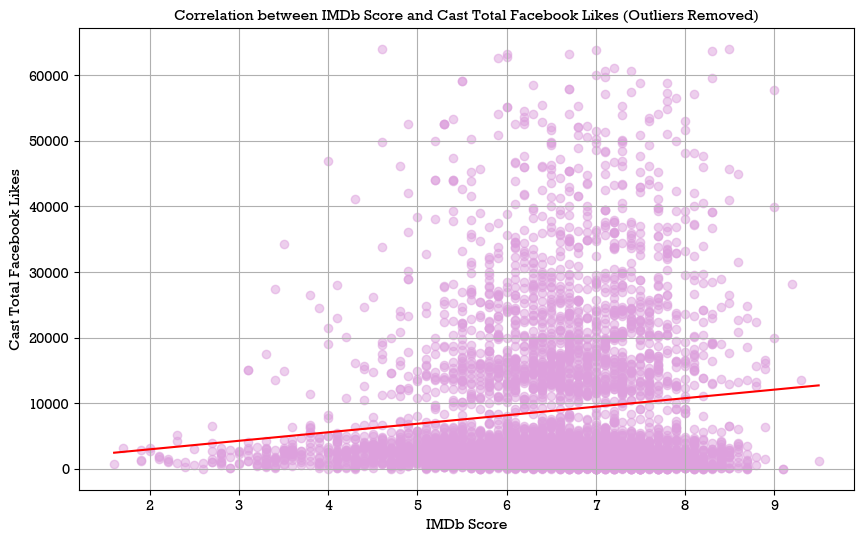

Outliers for Cast Total Facebook Likes (by movie title):
                                 movie_title  cast_total_facebook_likes
3                     The Dark Knight Rises                      106759
8                   Avengers: Age of Ultron                       92000
17                             The Avengers                       87697
27               Captain America: Civil War                       64798
33                      Alice in Wonderland                       79957
38                Oz the Great and Powerful                       73441
45                                 Furious 7                      79150
47               X-Men: Days of Future Past                       91434
74                            Evan Almighty                      108016
81              Snow White and the Huntsman                       72881
97                                Inception                       81115
103    The Hunger Games: Mockingjay - Part 2                      81385
105    

In [20]:
# Calculate z-scores for cast total Facebook likes
cast_fb_z_scores = np.abs((df['cast_total_facebook_likes'] - df['cast_total_facebook_likes'].mean()) / df['cast_total_facebook_likes'].std())

# Define threshold (e.g., z-score > 3 for outliers)
threshold = 3

# Find outliers for cast total Facebook likes
cast_fb_outliers = df[cast_fb_z_scores > threshold]

# Remove outliers from the DataFrame
df_filtered = df.drop(cast_fb_outliers.index)

# Perform linear regression
slope, intercept = np.polyfit(df_filtered['imdb_score'], df_filtered['cast_total_facebook_likes'], 1)
x_values = np.linspace(imdb_scores.min(), imdb_scores.max(), 100)
y_values = slope * x_values + intercept

#find the correlation coefficient
corr_coef = df['imdb_score'].corr(df['cast_total_facebook_likes'])
print("The correlation between IMDb Score and Cast Total Facebook Likes is", "%.2f" % corr_coef)

corr_coef = df_filtered['imdb_score'].corr(df_filtered['cast_total_facebook_likes'])
print("The correlation between IMDb Score and Cast Total Facebook Likes (Outliers Removed) is", "%.2f" % corr_coef)

# Create scatter plot with filtered data
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['imdb_score'], df_filtered['cast_total_facebook_likes'], label='Data points', alpha=0.5, color='plum')

# Plot the linear regression line
plt.plot(x_values, y_values, label='Linear Regression', color='red')

# Add labels and title
plt.title('Correlation between IMDb Score and Cast Total Facebook Likes (Outliers Removed)', font = 'RockWell')
plt.xlabel('IMDb Score', font = 'RockWell')
plt.ylabel('Cast Total Facebook Likes', font = 'RockWell')
plt.xticks(font = 'RockWell')
plt.yticks(font = 'RockWell')
plt.grid(True)

# Show plot
plt.show()

# List outliers by movie title
print("Outliers for Cast Total Facebook Likes (by movie title):")
print(cast_fb_outliers[['movie_title', 'cast_total_facebook_likes']])

In [12]:
# Extract the unique lead actor names from the DataFrame
actors = df['actor_1_name'].unique()

# Count the total number of unique lead actors
total_actors = len(actors)

# Print the list of actors
print("List of Lead Actors:")
for name in actors[:10]:
    print(name)

# Print the total number of unique actors
print("Total number of unique lead actors:", total_actors)

List of Lead Actors:
CCH Pounder
Johnny Depp
Christoph Waltz
Tom Hardy
Doug Walker
Daryl Sabara
J.K. Simmons
Brad Garrett
Chris Hemsworth
Alan Rickman
Total number of unique lead actors: 2098


In [13]:
# Group the DataFrame by actor name and calculate the count of movies and average rating, and store this data in a new df
actor_stats = df.groupby('actor_1_name').agg({'imdb_score': ['count', 'mean']})

# Rename the columns for clarity
actor_stats.columns = ['num_movies', 'average_rating']

# Print the statistics for each actor
print(actor_stats)

                       num_movies  average_rating
actor_1_name                                     
50 Cent                         1        5.000000
A.J. Buckley                    1        6.800000
Aaliyah                         1        5.200000
Aasif Mandvi                    1        6.700000
Abbie Cornish                   3        7.066667
...                           ...             ...
Zoë Kravitz                     3        6.566667
Zuhair Haddad                   1        7.600000
Álex Angulo                     1        7.200000
Ólafur Darri Ólafsson           1        8.200000
Óscar Jaenada                   1        6.800000

[2097 rows x 2 columns]


In [14]:
# Sort the DataFrame by the number of movies in descending order
actor_stats_bynum = actor_stats.sort_values(by='num_movies', ascending=False)

# Print the sorted DataFrame
print(actor_stats_bynum.head(10))

                   num_movies  average_rating
actor_1_name                                 
Robert De Niro             49        6.746939
Johnny Depp                41        6.736585
Nicolas Cage               33        6.118182
J.K. Simmons               31        6.674194
Bruce Willis               30        6.576667
Matt Damon                 30        6.983333
Denzel Washington          30        7.083333
Liam Neeson                29        6.472414
Steve Buscemi              27        6.425926
Harrison Ford              27        7.159259


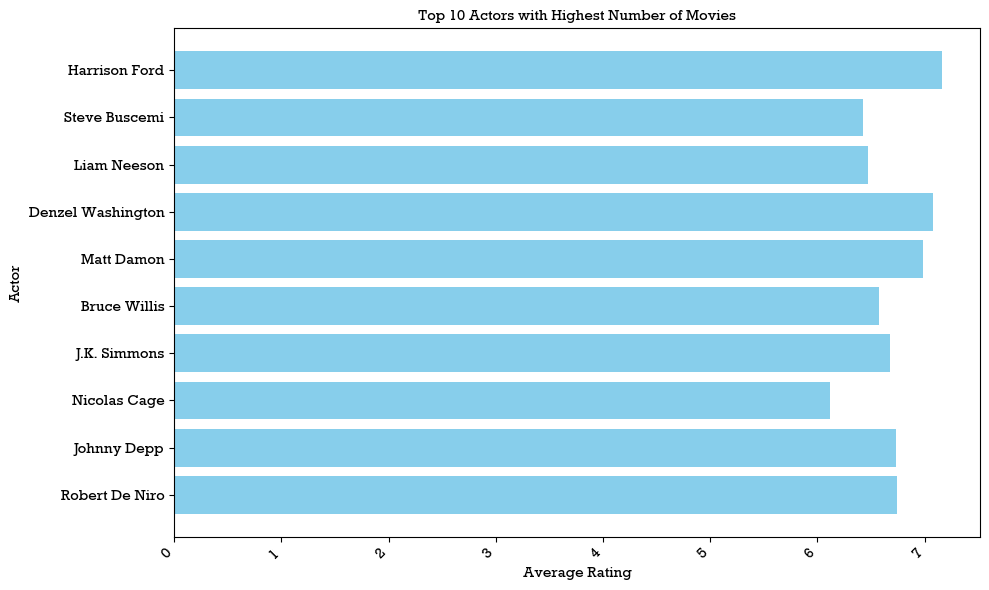

In [27]:
# Filter the top 10 actors with the highest numbers of movies
top_10_actors = actor_stats_bynum.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_10_actors.index, top_10_actors['average_rating'], color='skyblue')
plt.title('Top 10 Actors with Highest Number of Movies', font = 'RockWell')
plt.xlabel('Average Rating', font = 'RockWell')
plt.ylabel('Actor', font = 'RockWell')
plt.xticks(rotation=45, ha='right', font = 'RockWell')
plt.yticks(font = 'RockWell')
plt.tight_layout()
plt.show()

In [16]:
# Sort the DataFrame by the average rating in descending order
actor_stats_byrating = actor_stats.sort_values(by='average_rating', ascending=False)

# Select the top 10 directors with the highest average ratings
top_10_actors = actor_stats_byrating.head(10)

# Print the top 10 directors
print("Top 10 Lead Actors with the Highest Average Ratings:")
print(top_10_actors)

Top 10 Lead Actors with the Highest Average Ratings:
                    num_movies  average_rating
actor_1_name                                  
Krystyna Janda               2             9.1
Jack Warden                  1             8.9
Rob McElhenney               1             8.8
Elina Abai Kyzy              1             8.7
Kimberley Crossman           1             8.7
Takashi Shimura              1             8.7
Jackie Gleason               1             8.7
Abigail Evans                1             8.7
Maria Pia Calzone            1             8.7
Paulette Goddard             1             8.6


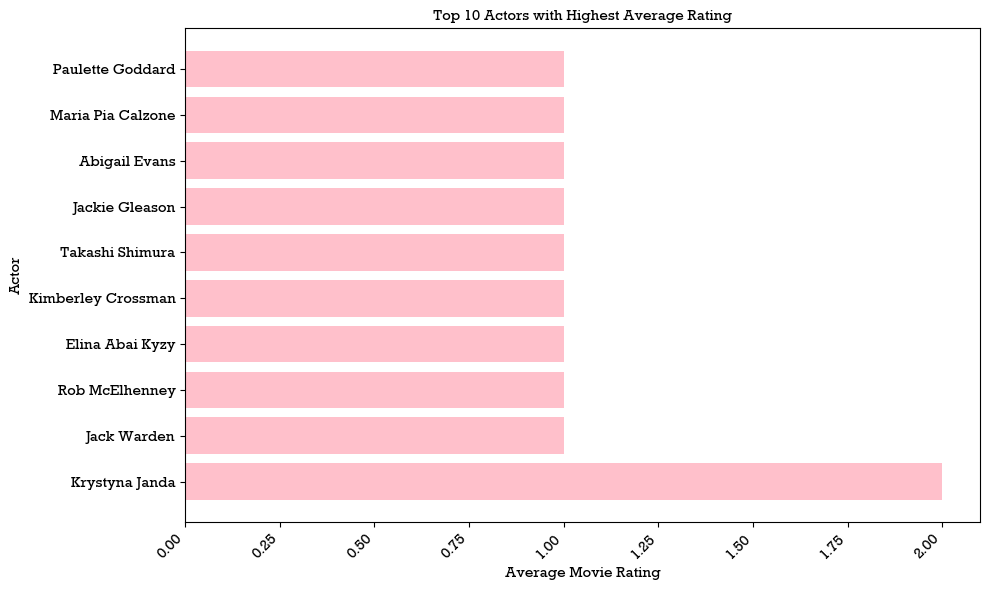

In [28]:
# Filter the top 10 actors with the highest ratings
top_rated_actors = actor_stats_byrating.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_rated_actors.index, top_rated_actors['num_movies'], color='pink')
plt.title('Top 10 Actors with Highest Average Rating', font = 'RockWell')
plt.xlabel('Average Movie Rating', font = 'RockWell')
plt.ylabel('Actor', font = 'RockWell')
plt.xticks(rotation=45, ha='right', font = 'RockWell')
plt.yticks(font = 'RockWell')
plt.tight_layout()
plt.show()